# 国家气象信息中心中提供的HRCLDAS数据资料

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from nmc_met_graphics.plot.china_map import add_china_map_2cartopy
from nmc_met_graphics.cmap.cm import make_cmap, show_colormap
from nmc_met_io.retrieve_micaps_server import get_model_grid
from nmc_met_graphics.cmap.ctables import cm_temperature_nws,cm_precipitation_nws
from nmc_met_graphics.plot.util import add_gridlines
from nmc_met_graphics.plot.cldas import fig_cldas_temp

In [3]:
# load micaps data
filename = '18121708.000'
data = get_model_grid('CLDAS/MAXIMUM_TEMPERATURE/2M_ABOVE_GROUND', filename=filename)
data = {'lon':data.coords['lon'].values, 'lat':data.coords['lat'].values, 'data':np.squeeze(data.values)}

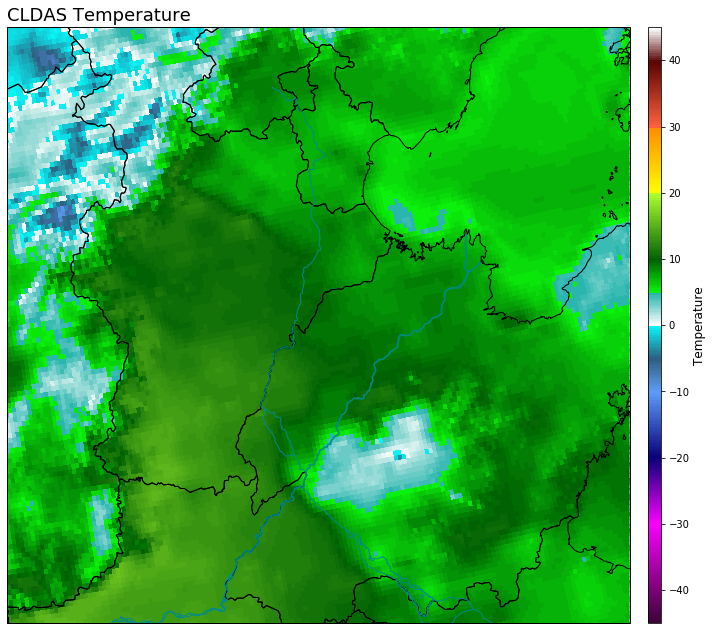

In [24]:
fig_cldas_temp(data, map_extent=(113, 120, 35, 40))

In [3]:
# load micaps data
filename = '18122315.000'
data = get_model_grid('CLDAS/RAIN01_TRI_DATA_SOURCE', filename=filename)

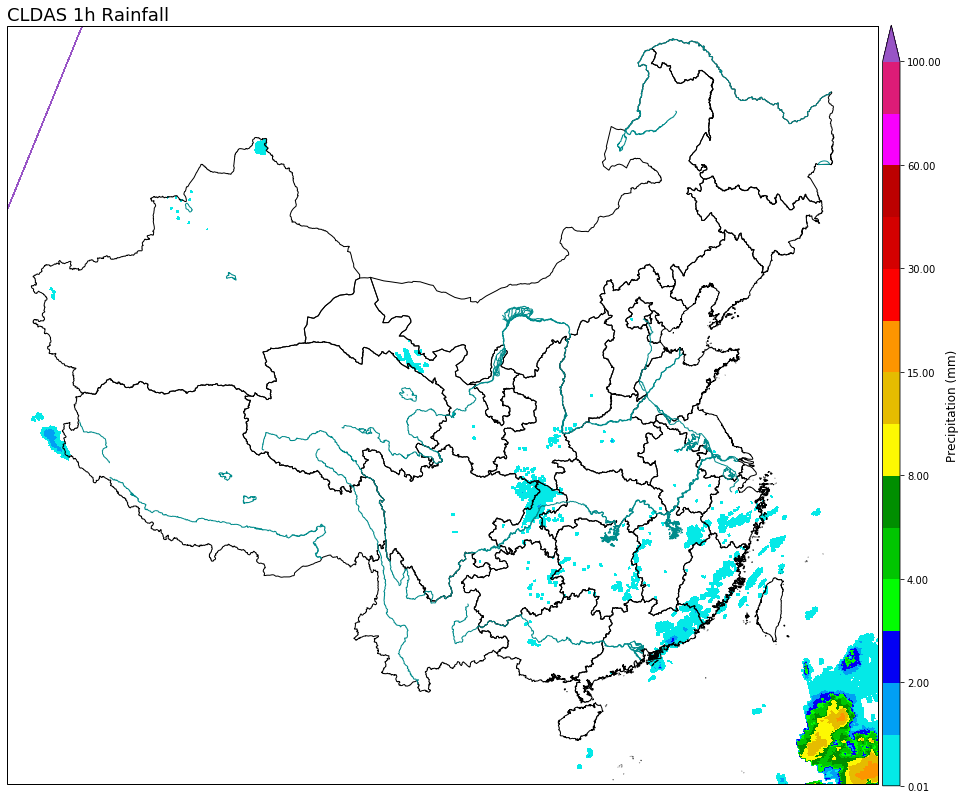

In [7]:
def fig_cldas_rain01(
    indata, figsize=None, map_extent=(80, 125, 16, 54),
    gridlines=False, outfile=None,
    title="CLDAS 1h Rainfall", time=None):
    """Produce CLDAS temperature map figure.
    
    Arguments:
        indata {dictionary or xarray dataset} -- 
            {'lon': 1D array, 'lat': 1D array, 'data': 2D array}
    
    Keyword Arguments:
        figsize {tuple} -- figure size (default: {(12,9)})
        map_extent {tuple} -- (lonmin, lonmax, latmin, latmax) (default: {(100, 125, 25, 45)})
        gridlines {bool} -- bool, draw grid lines or not. (default: {False})
        outfile {string} -- save figure to outfile (default: {None})
        title {string} -- figure title.
        time {datetime} -- analysis time.
    """

    # check data type
    if isinstance(indata, xr.core.dataarray.DataArray):
        data = {
            'lon':indata.coords['lon'].values,
            'lat':indata.coords['lat'].values,
            'data':np.squeeze(indata.values)}
    else:
        data = indata


    # set data projection
    datacrs = ccrs.PlateCarree()
    plotcrs = ccrs.AlbersEqualArea(
        central_latitude=(map_extent[2]+map_extent[3])/2.0,
        central_longitude=(map_extent[0]+map_extent[1])/2.0,
        standard_parallels=[30., 60.])
    
    # set figure
    fig_ratio = (map_extent[3]-map_extent[2])/(map_extent[1]-map_extent[0])
    width = 16
    height = width * 0.85 * fig_ratio
    fig = plt.figure(figsize=(width, height))
    gs = mpl.gridspec.GridSpec(
        1, 2, width_ratios=[1, .02], bottom=.07, top=.99,
        hspace=0.01, wspace=0.01)
    ax = plt.subplot(gs[0], projection=plotcrs)
    
    # plot map background
    ax.set_extent(map_extent, crs=datacrs)
    add_china_map_2cartopy(ax, name='province', edgecolor='k', lw=1)
    add_china_map_2cartopy(ax, name='river', edgecolor='darkcyan', lw=1)
    
    # draw CLDAS temperature
    cmap, norm = cm_precipitation_nws(atime=1)
    x, y = np.meshgrid(data['lon'], data['lat'])
    pm = ax.pcolormesh(x, y, np.squeeze(data['data']),
                       norm=norm, cmap=cmap, transform=datacrs)
    
    # add title
    plt.title(title,loc='left', fontsize=18)
    if time is not None:
        plt.title(time.strftime("%Y-%m-%dT%H"), loc='right', fontsize=18)
    
    # add grid lines
    if gridlines:
        add_gridlines(ax)
    
    # add color bar
    cax = plt.subplot(gs[1])
    cb = plt.colorbar(pm, cax=cax, orientation='vertical')
    cb.set_label('Precipitation (mm)', size=12)
    
    # return
    if outfile is not None:
        fig.savefig(outfile)
        plt.close(fig)
    return None

fig_cldas_rain01(data)

In [52]:
figsize = 12

In [54]:
isinstance(figsize, int)

True